# Exploratory Data Analysis(EDA)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import dataset
cancer_sur = pd.read_csv("haberman.csv")

In [3]:
cancer_sur.head()

,age,patient's year of operation,num. pos axillary nodes detected,survival status (1=survived 5+ years; 2=died within 5 years)
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
cancer_sur.columns = ['Age','Operation_year','axil_nodes_det','Sur_status']

In [5]:
cancer_sur.head()

,Age,Operation_year,axil_nodes_det,Sur_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
cancer_sur.tail()

,Age,Operation_year,axil_nodes_det,Sur_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


# High level statistics :-

In [7]:
print(cancer_sur.describe())
print("*"*60)
print(cancer_sur.info())

              Age  Operation_year  axil_nodes_det  Sur_status
count  306.000000      306.000000      306.000000  306.000000
mean    52.457516       62.852941        4.026144    1.264706
std     10.803452        3.249405        7.189654    0.441899
min     30.000000       58.000000        0.000000    1.000000
25%     44.000000       60.000000        0.000000    1.000000
50%     52.000000       63.000000        1.000000    1.000000
75%     60.750000       65.750000        4.000000    2.000000
max     83.000000       69.000000       52.000000    2.000000
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             306 non-null    int64
 1   Operation_year  306 non-null    int64
 2   axil_nodes_det  306 non-null    int64
 3   Sur_status      306 non-null    int64
dtypes: int64(4)
me

In [8]:
cancer_sur.shape

(306, 4)

In [9]:
cancer_sur['Sur_status'].value_counts()

1    225
2     81
Name: Sur_status, dtype: int64

# Univariate analysis:-

Provides summary statistics for each field in the raw data set (or) summary only on one variable.

Eg:- CDF,PDF,Box plot, Violin plot.(dont worry, will see below what each of them is)

C:\Users\PR269KB\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\PR269KB\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PR269KB\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


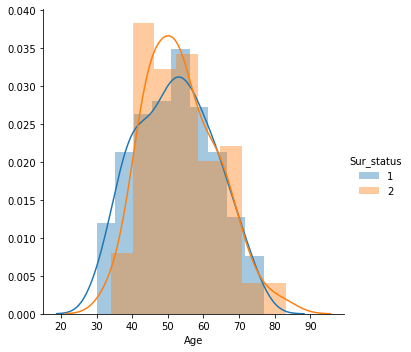

In [10]:
sns.FacetGrid(cancer_sur,hue='Sur_status',size=5).map(sns.distplot,'Age').add_legend()

In [11]:
import warnings
warnings.filterwarnings('ignore')

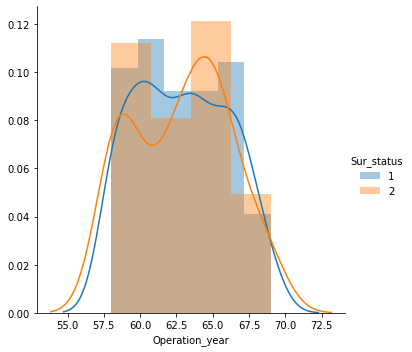

In [12]:
sns.FacetGrid(cancer_sur,hue='Sur_status',size=5).map(sns.distplot,'Operation_year').add_legend()

PDF =  [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
bin_edges =  [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
CDF =  [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


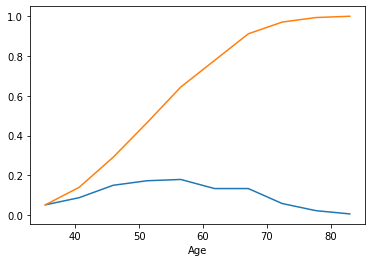

In [13]:
#PDF CDF
counts, bin_edges = np.histogram(cancer_sur['Age'], bins=10, density=True)

pdf = counts/sum(counts)
print('PDF = ',pdf)
print('bin_edges = ',bin_edges)

cdf = np.cumsum(pdf)
print('CDF = ',cdf)

plt.xlabel('Age')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# Bivariate analysis:-

Performed to find the relationship between each variable in the dataset and the target variable of interest (or) using 2 variables and finding realtionship between them.

Eg :-Box plot,Voilin plot.

<AxesSubplot:xlabel='Sur_status', ylabel='Operation_year'>

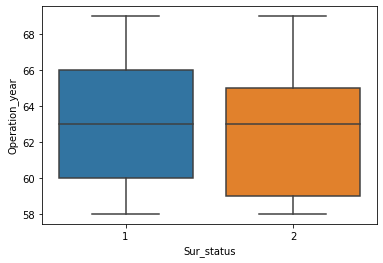

In [14]:
sns.boxplot(x='Sur_status',y='Operation_year',data=cancer_sur)

<AxesSubplot:xlabel='Sur_status', ylabel='Operation_year'>

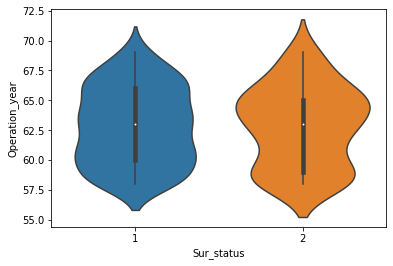

In [15]:
sns.violinplot(x='Sur_status',y='Operation_year',data=cancer_sur, size=8)

# Multivariate analysis:- 

Performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2.

Eg:- Pair plot and 3D scatter plot.

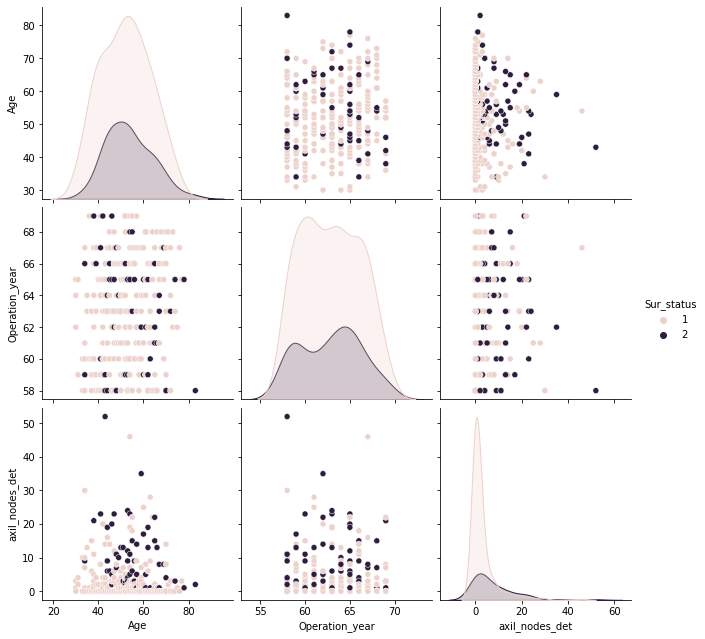

In [16]:
sns.pairplot(cancer_sur,hue='Sur_status',size=3)